# 1. Uvozimo knjižice

In [1]:
import os
import glob
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
import time as dt
import warnings
warnings.filterwarnings('ignore')

folder_path = "C:/Users/kmest/zbrani_podatki"

# seznam vseh txt datotek v mapi
txt_files = glob.glob(folder_path + "/*.txt")

 # Prebere vse txt datoteke kot podatkovni okvir pandas
for txt_file in txt_files:
    df = pd.read_csv(txt_file, delimiter=',', header=None, error_bad_lines=False, names=['leto', 'mesec', 'dan','etp','padavine','tmin','tmax','tpovp'],usecols=range(8))
    base_name = os.path.basename(txt_file)
    base_name = base_name.split('.')[0] # odstrani končnico datoteke – če sta ločeni z '.'
    df = df.assign(mesto=base_name)  #dodam novi stolpec = ime mesta
    csv_file = os.path.splitext(txt_file)[0] + ".csv"
    df.to_csv(csv_file, index=False)

    
# glob za branje csv datotek
csv_files = glob.glob(folder_path + "/*.csv")
df_list = []
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df_list.append(df)


df_final = pd.concat(df_list, axis=0)
df_final.interpolate(method='linear', axis=0, inplace=True)
df_final.replace(',', '\t', inplace=True)
display(df_final)
#df_final.columns





,leto,mesec,dan,etp,padavine,tmin,tmax,tpovp,mesto
0,1961,1,1,0.2,0.0,-4.6,0.2,-2.0,BABNO_POLJE
1,1961,1,2,0.2,17.0,-3.2,1.2,-0.2,BABNO_POLJE
2,1961,1,3,0.6,4.6,-3.0,6.5,4.3,BABNO_POLJE
3,1961,1,4,0.5,18.0,0.0,5.8,2.2,BABNO_POLJE
4,1961,1,5,0.2,27.0,-3.2,2.8,-1.1,BABNO_POLJE
...,...,...,...,...,...,...,...,...,...
18502,2011,12,27,0.0,0.2,12.2,22.7,17.4,SEVNO
18503,2011,12,28,0.0,0.0,12.2,22.7,17.4,SEVNO
18504,2011,12,29,0.0,0.0,12.2,22.7,17.4,SEVNO
18505,2011,12,30,0.0,5.5,12.2,22.7,17.4,SEVNO


# 2. Analiza padavin

## 2.1. Povprečna količina padavin v mestih v Sloveniji od 1961 do 2022

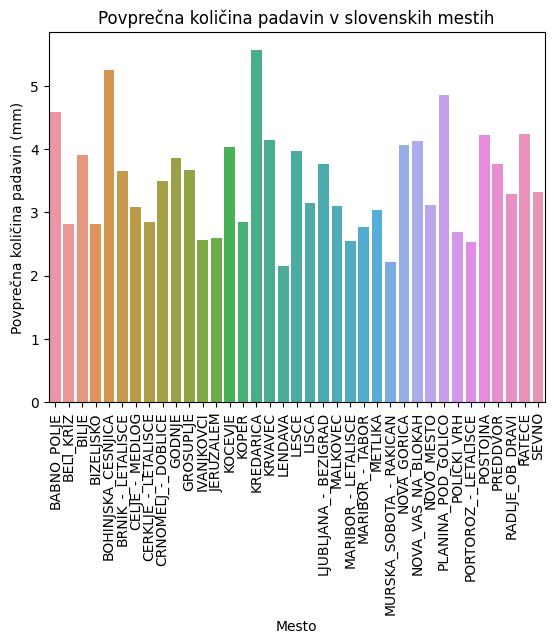

In [2]:
rainfall_mean = df_final.groupby(['mesto'])['padavine'].mean()


sns.barplot(x=rainfall_mean.index, y=rainfall_mean.values)
plt.xlabel('Mesto')
plt.ylabel('Povprečna količina padavin (mm)')
plt.title('Povprečna količina padavin v slovenskih mestih')
plt.xticks(rotation=90)
plt.show()

## 2.2 Povprečna količina padavin po letah

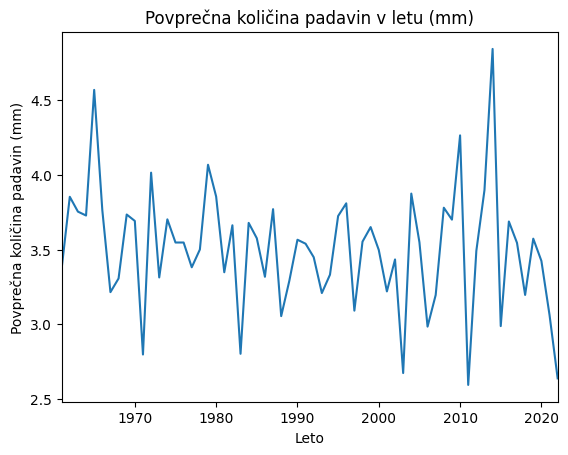

In [3]:
df_grouped = df_final.groupby('leto')

df_rainfall = df_grouped['padavine'].mean()

df_rainfall.plot()
plt.xlabel('Leto')
plt.xlim(df_final['leto'].min(), df_final['leto'].max())
plt.ylabel('Povprečna količina padavin (mm)')
plt.title('Povprečna količina padavin v letu (mm)')
plt.show()




## 2.3 Povprečna količina padavin po mesecih

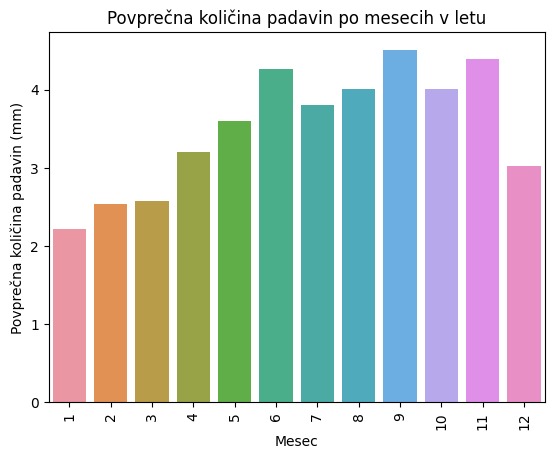

In [4]:
rainfall_mean = df_final.groupby(['mesec'])['padavine'].mean()


sns.barplot(x=rainfall_mean.index, y=rainfall_mean.values)
plt.xlabel('Mesec')
plt.ylabel('Povprečna količina padavin (mm)')
plt.title('Povprečna količina padavin po mesecih v letu')
plt.xticks(rotation=90)
plt.show()


## 2.4 Skupna količina padavin v mestih v Sloveniji od 1961 do 2022

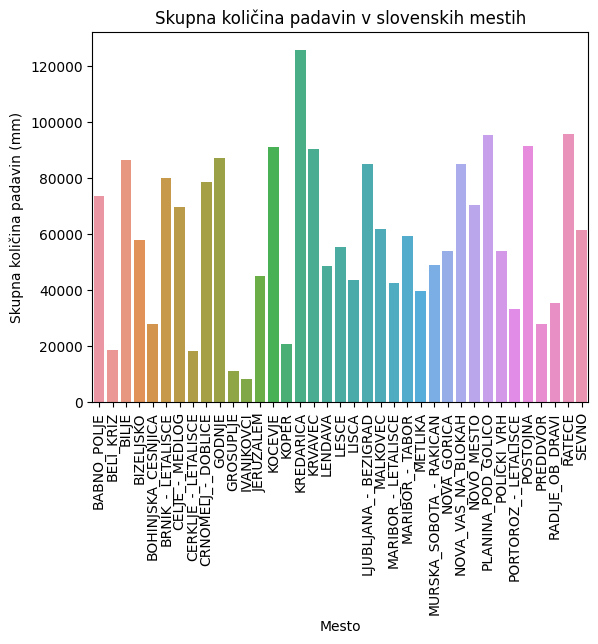

In [5]:
rainfall_sum = df_final.groupby(['mesto'])['padavine'].sum()

sns.barplot(x=rainfall_sum.index, y=rainfall_sum.values)
plt.xlabel('Mesto')
plt.ylabel('Skupna količina padavin (mm)')
plt.title('Skupna količina padavin v slovenskih mestih')
plt.xticks(rotation=90)
plt.show()

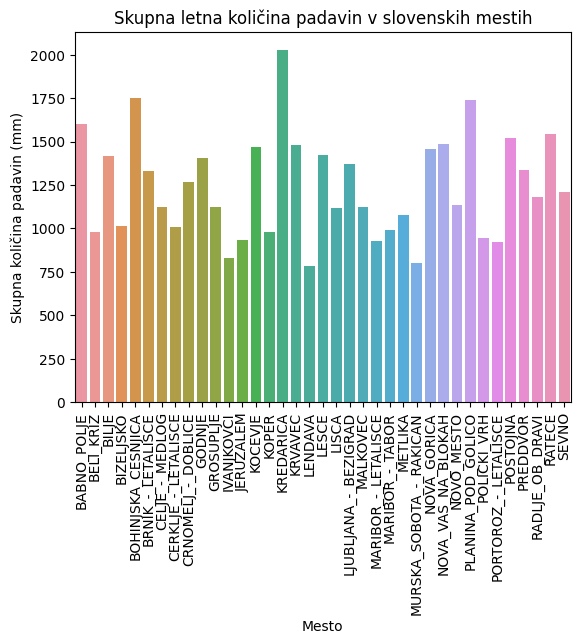

In [6]:
rainfall_sum = df_final.groupby(['leto', 'mesto'])['padavine'].sum()

rainfall_sum = rainfall_sum.unstack()

sns.barplot(data=rainfall_sum, ci=None)
plt.xlabel('Mesto')
plt.ylabel('Skupna količina padavin (mm)')
plt.title('Skupna letna količina padavin v slovenskih mestih')
plt.xticks(rotation=90)
plt.show() 

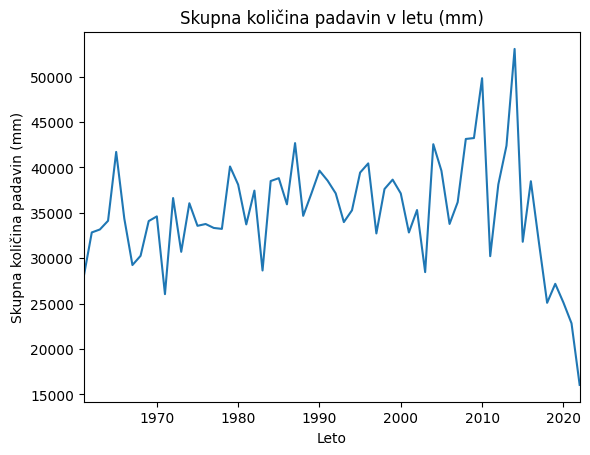

In [7]:
df_grouped = df_final.groupby('leto')

df_rainfall = df_grouped['padavine'].sum()

df_rainfall.plot()
plt.xlabel('Leto')
plt.xlim(1961, 2022)
plt.ylabel('Skupna količina padavin (mm)')
plt.title('Skupna količina padavin v letu (mm)')
plt.show()


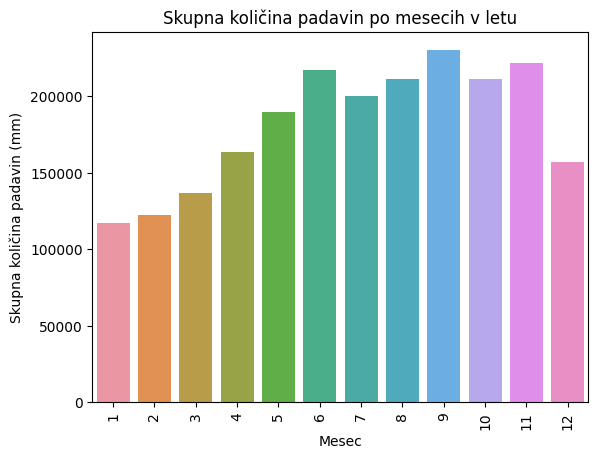

In [8]:
rainfall_sum= df_final.groupby(['mesec'])['padavine'].sum()

# Create a bar plot of the mean rainfall for each city
sns.barplot(x=rainfall_sum.index, y=rainfall_sum.values)
plt.xlabel('Mesec')
plt.ylabel('Skupna količina padavin (mm)')
plt.title('Skupna količina padavin po mesecih v letu')
plt.xticks(rotation=90)
plt.show()

## 2.5 Maksimalna količina padavin v letu

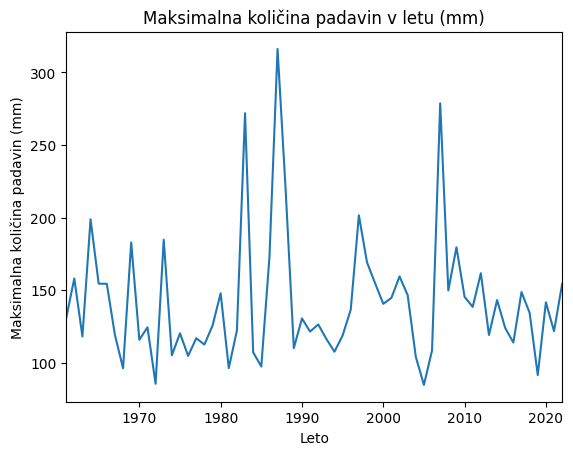

In [9]:
df_grouped = df_final.groupby('leto')

df_rainfall = df_grouped['padavine'].max()

df_rainfall.plot()
plt.xlabel('Leto')
plt.xlim(1961, 2022)
plt.ylabel('Maksimalna količina padavin (mm)')
plt.title('Maksimalna količina padavin v letu (mm)')
plt.show()



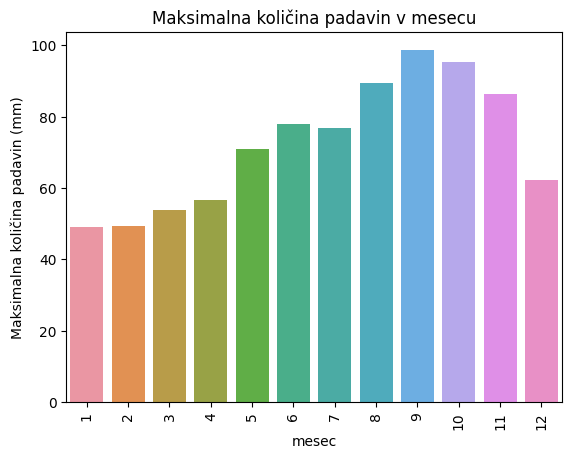

In [14]:
rainfall_max = df_final.groupby(['leto', 'mesec'])['padavine'].max()

# unstack the MultiIndex and pivot the data so each row represents a city and each column a year
rainfall_max = rainfall_max.unstack()

# create the bar plot using Seaborn
sns.barplot(data=rainfall_max, ci=None)
plt.xlabel('mesec')
plt.ylabel('Maksimalna količina padavin (mm)')
plt.title('Maksimalna količina padavin v mesecu')
plt.xticks(rotation=90)
plt.show() 

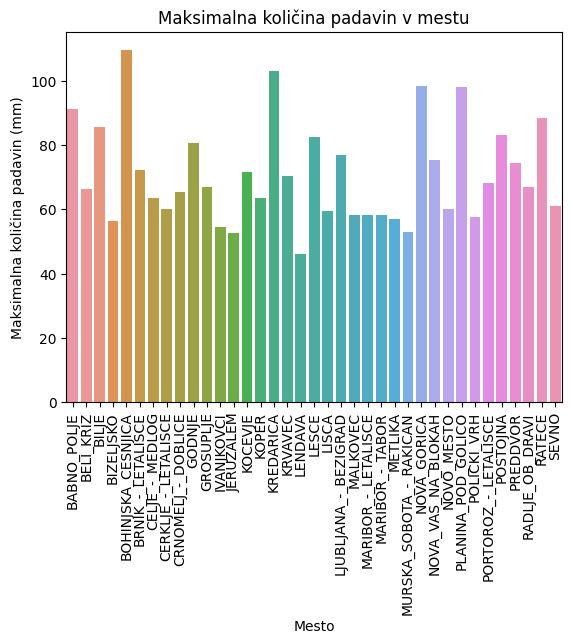

In [15]:
rainfall_max = df_final.groupby(['leto', 'mesto'])['padavine'].max()

rainfall_max = rainfall_max.unstack()


sns.barplot(data=rainfall_max, ci=None)
plt.xlabel('Mesto')
plt.ylabel('Maksimalna količina padavin (mm)')
plt.title('Maksimalna količina padavin v mestu')
plt.xticks(rotation=90)
plt.show() 

## 2.6 Število suhih in mokrih dneh v slovenskih mestih

In [33]:
for mesto in df_final['mesto'].unique():

    selected = df_final[(df_final['mesto'] == mesto)] 
    selected['Type'] = np.where(selected['padavine'] > 0, 'Mokri dnevi', 'Suhi dnevi')
    grouped = selected.groupby(['leto', 'Type'])
    grouped= grouped.agg({'dan': 'count'})
    grouped = grouped.reset_index()
    
    '''sns.set(rc={'figure.figsize':(15,7)})
    g = sns.catplot(x='leto', y='dan', hue='Type',kind='bar', data=grouped, width=0.8)
    plt.xticks(rotation=90)
    g.set(xlabel='Leto', ylabel='Število dni', title=f'Število suhih in mokrih dni v {mesto}')
    plt.show()'''

## 2.7 Varianca padavin

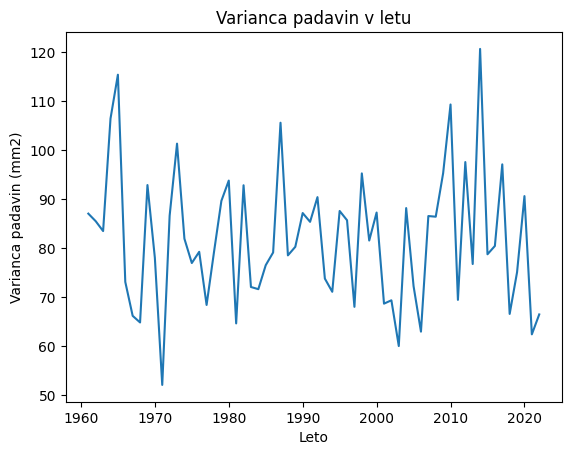

In [16]:
variance_rainfall = df_final.groupby('leto')['padavine'].var() 

plt.plot(variance_rainfall) 
plt.xlabel('Leto') 
plt.ylabel('Varianca padavin (mm2)') 
plt.title('Varianca padavin v letu') 
plt.show() 


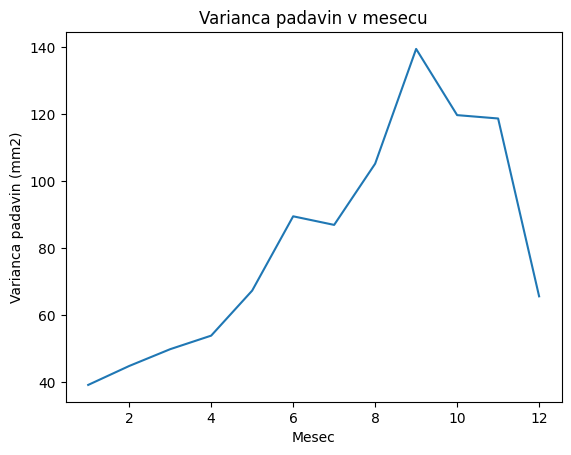

In [18]:
variance_rainfall = df_final.groupby('mesec')['padavine'].var() 

plt.plot(variance_rainfall) 
plt.xlabel('Mesec') 
plt.ylabel('Varianca padavin (mm2)') 
plt.title('Varianca padavin v mesecu') 
plt.show() 


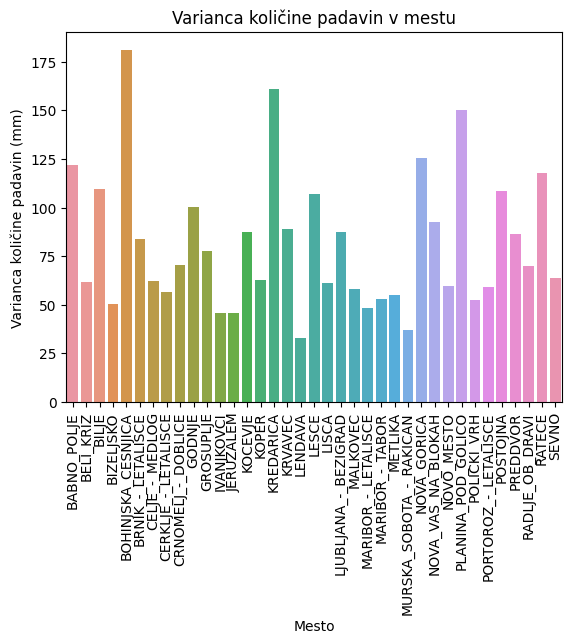

In [20]:
rainfall_var = df_final.groupby(['leto', 'mesto'])['padavine'].var()
rainfall_var = rainfall_var.unstack()

sns.barplot(data=rainfall_var, ci=None)
plt.xlabel('Mesto')
plt.ylabel('Varianca količine padavin (mm)')
plt.title('Varianca količine padavin v mestu')
plt.xticks(rotation=90)
plt.show() 

## 2.8. Standardna devijacija padavin

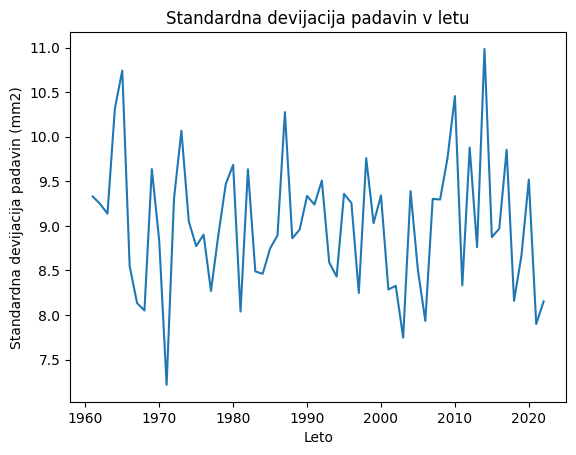

In [24]:
std_rainfall = df_final.groupby('leto')['padavine'].std() 


plt.plot(std_rainfall) 
plt.xlabel('Leto') 
plt.ylabel('Standardna devijacija padavin (mm2)') 
plt.title('Standardna devijacija padavin v letu') 
plt.show() 


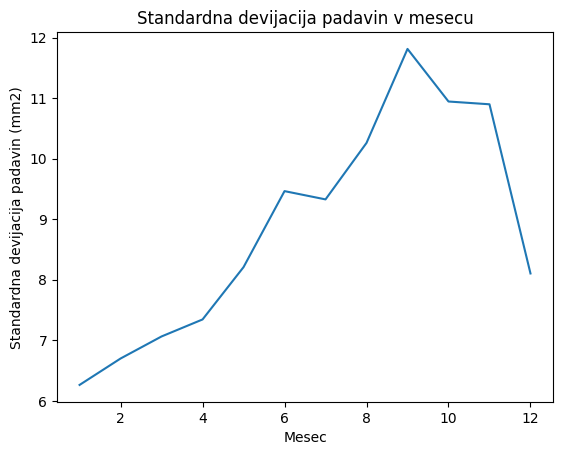

In [25]:
std_rainfall = df_final.groupby('mesec')['padavine'].std() 


plt.plot(std_rainfall) 
plt.xlabel('Mesec') 
plt.ylabel('Standardna devijacija padavin (mm2)') 
plt.title('Standardna devijacija padavin v mesecu') 
plt.show() 
